# 第 4 章 线性回归

第3章中介绍的KNN算法是最简单的机器学习算法之一，本章将逐步引入一些数学工具，讲解另一个较为简单的机器学习算法——线性回归（linear regression）。与上一章介绍的k近邻算法不同，线性回归是一种基于数学模型的算法，其首先假设数据集中的样本与标签之间存在线性关系，再建立线性模型求解该关系中的各个参数。在实际生活中，线性回归算法因为其简单易算，在统计学、经济学、天文学、物理学等领域中都有着广泛应用。下面，我们从线性回归的数学描述开始，讲解线性回归的原理和实践。

## 4.1 线性回归的映射形式和学习目标

顾名思义，在“线性”回归问题中，我们假设输入与输出成线性关系。设输入$\boldsymbol{x} \in \mathbb{R}^d$，那么该线性映射关系可以写为 
$$
f_{\boldsymbol{\theta}}(\boldsymbol{x})=\boldsymbol{\theta}^\mathrm{T} \boldsymbol{x} = \theta_1 x_1 + \cdots + \theta_d x_d
$$
其中$\boldsymbol{\theta} \in \mathbb{R}^d$是模型的参数，我们通常以脚标$f_{\boldsymbol{\theta}}$的形式来表示$\boldsymbol{\theta}$是模型$f$的参数。如果线性回归需要包含常数项，我们只需再添加一维参数$\theta_0$以及对应的常数特征$x_0=1$即可。这样上式的形式没有变化，只是向量的维度由$d$变为$d+1$。为了表达的简洁，下面不再将常数项单独拆开表示和分析。图4-1展示了输入特征是1维和2维情况下的数据点和线性回归模型拟合的结果。在$d$维输入特征和1维输出特征的情况下，线性回归模型共有$d+1$个参数，从而给出了$d+1$维空间中的一个$d$维超平面。

<img src=linear_model.png width=100% alt=linear_model>

图 4-1 1维和2维输入特征的线性模型

在机器学习中，我们一般先设计损失函数，由模型预测的标签与真实标签之间的误差计算损失的值，并通过最小化损失函数来训练模型，调整模型参数。设共有$N$个输入数据$\boldsymbol{x}_1, \ldots, \boldsymbol{x}_N$，其对应的标签分别是$y_1, \ldots, y_N$，那么模型的总损失为：
$$
J(\boldsymbol{\theta}) = \frac{1}{N} \sum_{i=1}^N \mathcal{L}(y_i, f_{\boldsymbol{\theta}}(\boldsymbol{x}_i))
$$
其中$\mathcal{L}(y_i, f_{\boldsymbol{\theta}}(\boldsymbol{x}_i))$为单个样本的损失函数，用来衡量真实标签与预测标签之间的距离。我们定义损失函数为平方损失：
$$
\mathcal{L}(y_i, f_{\boldsymbol{\theta}}(\boldsymbol{x}_i)) = \frac12 (y_i - f_{\boldsymbol{\theta}}(\boldsymbol{x}_i))^2
$$

式中的系数$1/2$是为了求导后与系数2抵消，便于计算。均方误差的形状如图4-2所示。我们可以看到，在$y_i$与$f_{\boldsymbol{\theta}}(\boldsymbol{x}_i)$距离较小的情况下，损失也较小并且变化不大，而随着两者的距离增大，其损失以二次速度迅速增长。这样的损失函数的设计可以让模型倾向忽略预测已经很精准的数据，而重点关注预测和标签差距较大的数据。要知道，特征和标签数据的采集经常会带上些许的偏差或者噪声，例如我们做物理实验时，测量一个物体的尺寸往往需要测量多次后取平均来降低测量噪声带来的不确定度。因此，当预测和标签已经足够接近时，没有必要将精力放在进一步消除最后一点损失上。

<img src=mse.png width=50% alt=mse>
图 4-2 均方误差

将该损失函数代入总误差可得
$$
J(\boldsymbol{\theta})=\frac{1}{2N} \sum_{i=1}^N (y_i - f_{\boldsymbol{\theta}}(x_i))^2
$$
这一总损失函数称为均方误差（mean squared error，MSE），是最常用的损失函数之一。因此，线性回归问题的优化目标为：
$$
\min_{\boldsymbol{\theta}} J(\boldsymbol{\theta}) = \frac{1}{2N} \sum_{i=1}^N (y_i - f_{\boldsymbol{\theta}}(\boldsymbol{x}_i))^2
$$

## 4.2 线性回归的解析方法

为了使表达式更简洁，我们进一步将数据聚合，把输入向量和标签组合成矩阵： 
$$
\boldsymbol{X}=\begin{pmatrix} 
\boldsymbol{x}_1^\mathrm{T}\ \\ 
\vdots\\ 
\boldsymbol{x}_N^\mathrm{T} 
\end{pmatrix}, \quad\quad
\boldsymbol{y} = \begin{pmatrix}
y_1 \\
\vdots \\
y_N
\end{pmatrix}
$$
其中 $\boldsymbol{X}$的每一行对应一个数据实例的特征向量，每一列对应了一个具体特征在各个数据实例上的取值。这样，以向量的平方作为损失函数，可将总损失写为：
$$
J(\boldsymbol{\theta}) = \frac{1}{2} (\boldsymbol{y} - \boldsymbol{X\theta})^\mathrm{T}(\boldsymbol{y} - \boldsymbol{X\theta})
$$

这里的损失函数事实上是所有样本平方误差的和，与MSE相差一步取平均值，即除以样本总数 $N$。但常数系数不影响优化得到的最终结果，为了形式简洁，我们通常在矩阵形式下省略这一系数。但是在实际计算时，为了降低样本规模的影响，绝大多数情况下还是以平均后的值作为实际损失。

为了求函数$J(\boldsymbol{\theta})$的最小值，我们寻找其对$\boldsymbol{\theta}$导数为零的点：
$$
\frac{\partial J}{\partial \boldsymbol{\theta}} = \boldsymbol{0}
$$

计算偏导数，得到：
$$
\begin{aligned}
\boldsymbol{0} = \frac{\partial J}{\partial \boldsymbol{\theta}} &= \frac{\partial }{\partial \boldsymbol{\theta}} \frac{1}{2} (\boldsymbol{y}^\mathrm{T} \boldsymbol{y} - \boldsymbol{y}^\mathrm{T}\boldsymbol{X\theta} - (\boldsymbol{X\theta})^\mathrm{T}\boldsymbol{y} + (\boldsymbol{X\theta})^\mathrm{T} \boldsymbol{X\theta})\\
&= \frac{1}{2} \left( \frac{\partial \boldsymbol{y}^\mathrm{T} \boldsymbol{y}}{\partial \boldsymbol{\theta}} -  \frac{\partial \boldsymbol{y}^\mathrm{T}\boldsymbol{X\theta}}{\partial \boldsymbol{\theta}} - \frac{\partial (\boldsymbol{X\theta})^\mathrm{T}\boldsymbol{y}}{\partial \boldsymbol{\theta}} + \frac{\partial (\boldsymbol{X\theta})^\mathrm{T} \boldsymbol{X\theta}}{\partial \boldsymbol{\theta}}\right) \\
&= -\boldsymbol{X}^\mathrm{T}\boldsymbol{y} + \boldsymbol{X}^\mathrm{T}\boldsymbol{X\theta}
\end{aligned}
$$

通过上式得到$\boldsymbol{\theta}$的解析解为：
$$
\begin{aligned}
& &\boldsymbol{0} &= -\boldsymbol{X}^\mathrm{T}\boldsymbol{y} + \boldsymbol{X}^\mathrm{T}\boldsymbol{X\theta} \\
&\Rightarrow& \boldsymbol{X}^\mathrm{T}\boldsymbol{X\theta} &= \boldsymbol{X}^\mathrm{T}\boldsymbol{y} \\
&\Rightarrow& \boldsymbol{\theta} &= (\boldsymbol{X}^\mathrm{T}\boldsymbol{X})^{-1}\boldsymbol{X}^\mathrm{T}\boldsymbol{y}
\end{aligned}
$$

于是，算法学到的模型对训练数据的预测为：
$$
f_{\boldsymbol{\theta}}(\boldsymbol{X}) = \boldsymbol{X\theta} = \boldsymbol{X}(\boldsymbol{X}^\mathrm{T}\boldsymbol{X})^{-1}\boldsymbol{X}^\mathrm{T}\boldsymbol{y}
$$

下面，我们用NumPy库中的线性代数相关工具，直接用解析解来计算线性回归模型。

## 4.3 动手实现线性回归的解析方法

本章采用的数据集由房屋信息与房屋售价组成。其中，房屋信息包含所在区域平均收入、区域平均房屋年龄、区域平均房间数、区域平均卧室数、人口等。我们希望根据某一区域中房屋的整体信息，用线性模型预测该区域中房屋的平均售价。表4-1展示了其中的3条数据。

表 4-1 房屋信息数据示例

| 区域平均收入 | 区域平均房屋年龄  | 区域平均房间数  | 区域平均卧室数  | 区域人口  | 房屋售价  |
| :------: | :------: | :------: | :------: | :------: | :------: |
| 79545.46 | 5.68  |	7.01  |4.09  |	23086.80  |	1059033.56  | 
| 79248.64 | 6.00  | 6.73 | 3.09 | 40173.07 | 1505890.91 |
| 61287.06 | 5.86 | 8.51 | 5.13 | 36882.15 | 1058987.98 |

我们首先读入并处理数据，并且划分训练集与测试集，为后续算法实现做准备。这里我们会用到sklearn中的数据处理工具包`preprocessing`中的`StandardScalar`类。该类的`fit`函数可以根据输入的数据计算平均值和方差，并用计算结果将数据标准化，使其均值为0、方差为1。例如，数组`[0, 1, 2, 3, 4]`经过标准化，就变为`[-1.41, -0.71, 0.00, 0.71, 1.41]`。对输入数据进行标准化，可以避免不同特征的数据之间数量级差距过大导致的问题。以上面列出的数据条目为例，区域平均收入在$10^4$数量级，而区域平均卧室数在$10^0$数量级，如果直接用原始数据进行训练，假如区域平均收入在运算中产生了$0.1\%$的误差，约为$10^1$，就几乎足够掩盖区域平均卧室数带来的影响。因此，通常来说，我们在训练前将不同特征的数据放缩到同一量级上。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn.preprocessing import StandardScaler

# 从源文件加载数据，并输出查看数据的各项特征
lines = np.loadtxt('USA_Housing.csv', delimiter=',', dtype='str')
header = lines[0]
lines = lines[1:].astype(float)
print('数据特征：', ', '.join(header[:-1]))
print('数据标签：', header[-1])
print('数据总条数：', len(lines))

# 划分训练集与测试集
ratio = 0.8
split = int(len(lines) * ratio)
np.random.seed(0)
lines = np.random.permutation(lines)
train, test = lines[:split], lines[split:]

# 数据归一化
scaler = StandardScaler()
scaler.fit(train) # 只使用训练集的数据计算均值和方差
train = scaler.transform(train)
test = scaler.transform(test)

# 划分输入和标签
x_train, y_train = train[:, :-1], train[:, -1].flatten()
x_test, y_test = test[:, :-1], test[:, -1].flatten()

数据特征： Avg. Area Income, Avg. Area House Age, Avg. Area Number of Rooms, Avg. Area Number of Bedrooms, Area Population
数据标签： Price
数据总条数： 5000


我们按照4.2的推导，利用NumPy库中的工具直接进行矩阵运算，并输出预测值与真实值的误差。衡量误差的标准也有很多，这里我们采用均方根误差（rooted mean squared error，RMSE）。对于真实值$y_1,\ldots, y_N$和预测值$\hat y_1,\ldots,\hat y_N$，RMSE为：
$$
\mathcal{L}_{\mathrm{RMSE}}(\boldsymbol y, \hat{\boldsymbol y}) = \sqrt{\frac1N \sum_{i=1}^N (y_i - \hat y_i)^2}
$$

RMSE与MSE非常接近，但是平方再开方的操作使得RMSE应当与$y$具有相同的量纲，从直观上易于比较。我们可以简单认为，对于任意样本$\boldsymbol{x}$，模型预测的标签$\hat y$与真实值$y$之间的偏差大致就等于RMSE的值。而MSE由于含有平方，其量纲和数量级相对来说不够直观，但其更容易求导。因此，我们常将MSE作为训练时的损失函数，而用RMSE作为模型的评价指标。

In [2]:
# 在X矩阵最后添加一列1，代表常数项
X = np.concatenate([x_train, np.ones((len(x_train), 1))], axis=-1)
# @ 表示矩阵相乘，X.T表示矩阵X的转置，np.linalg.inv函数可以计算矩阵的逆
theta = np.linalg.inv(X.T @ X) @ X.T @ y_train
print('回归系数：', theta)

# 在测试集上使用回归系数进行预测
X_test = np.concatenate([x_test, np.ones((len(x_test), 1))], axis=-1)
y_pred = X_test @ theta

# 计算预测值和真实值之间的RMSE
rmse_loss = np.sqrt(np.square(y_test - y_pred).mean())
print('RMSE：', rmse_loss)

回归系数： [ 6.50881254e-01  4.67222833e-01  3.38466198e-01  6.17275856e-03
  4.26857089e-01 -1.46033359e-14]
RMSE： 0.28791834247503534


## 4.4 使用sklearn中的线性模型

接下来，我们使用sklearn中已有的工具`LinearRegression`来实现线性回归模型。可以看出，该工具计算得到的回归系数与RMSE都和我们用解析方式计算的结果相同。

In [3]:
from sklearn.linear_model import LinearRegression

# 初始化线性模型
linreg = LinearRegression()
# LinearRegression的方法中已经考虑了线性回归的常数项，所以无须再拼接1
linreg.fit(x_train, y_train)

# coef_是训练得到的回归系数，intercept_是常数项
print('回归系数：', linreg.coef_, linreg.intercept_)
y_pred = linreg.predict(x_test)

# 计算预测值和真实值之间的RMSE
rmse_loss = np.sqrt(np.square(y_test - y_pred).mean())
print('RMSE：', rmse_loss)

回归系数： [0.65088125 0.46722283 0.3384662  0.00617276 0.42685709] -1.4635041882766192e-14
RMSE： 0.2879183424750354


## 4.5 梯度下降算法

虽然对于线性回归问题，我们在选取平方损失函数后可以通过数学推导得到问题的解析解。但是，这样的做法有一些严重的缺陷。第一，解析解中涉及大量的矩阵运算，非常耗费时间和空间。假设样本数目为$N$，特征维度为$d$，那么$\boldsymbol{X} \in \mathbb{R}^{N\times d}, \boldsymbol{y} \in \mathbb{R}^N$。按照式$\boldsymbol{\theta} = (\boldsymbol{X}^\mathrm{T}\boldsymbol{X})^{-1}\boldsymbol{X}^\mathrm{T}\boldsymbol{y}$进行计算的时间复杂度大约是$O(Nd^2+d^3)$。虽然我们可以通过矩阵运算技巧进行优化，但时间开销仍然较大。此外，当样本很多时，存储矩阵$\boldsymbol{X}$也会占用大量空间。第二，在更广泛的机器学习模型中，大多数情况下我们都无法得到解析解，或求解析解非常困难。因此，我们通常会采用数值模拟的方法，避开复杂的计算，经过一定次数的迭代，得到与解析解误差很小的数值解。本节继续以平方损失函数的线性回归为例，介绍机器学习中非常常用的数值计算方法：梯度下降（gradient decent）算法。

回顾梯度的意义，我们可以发现，梯度的方向就是函数值上升最快的方向。那么反过来说，梯度的反方向就是函数值下降最快的方向。如果我们将参数不断沿梯度的反方向调整，就可以使函数值以最快的速度减小。当函数值几乎不再改变时，我们就找到了函数的一个局部极小值。而对于部分较为特殊的函数，其局部极小值就是其全局最小值。在此情况下，梯度下降算法最后可以得到全局最优解。我们暂时不考虑具体哪些函数满足这样的条件，而是按照直观的思路进行简单的推导。设模型参数为$\boldsymbol{\theta}$，损失函数为$J(\boldsymbol{\theta})$。那么梯度下降的公式为：
$$
\boldsymbol{\theta} \gets \boldsymbol{\theta} - \eta \nabla_{\boldsymbol{\theta}} J(\boldsymbol{\theta})
$$

其中，$\gets$表示令左边的变量等于右边表达式的值，$\eta$是参数更新的步长，称为学习率（learning rate）。我们将上节推导的带平均的线性回归损失函数代入进去，就得到：
$$
\begin{aligned}
\boldsymbol{\theta} &\gets \boldsymbol{\theta} - \eta \nabla_{\boldsymbol{\theta}} \left( \frac{1}{2N} \sum_{i=1}^N (y_i - f_{\boldsymbol{\theta}}(\boldsymbol{x}_i))^2 \right) \\
&= \boldsymbol{\theta} - \frac{\eta}{N}\sum_{i=1}^N (f_{\boldsymbol{\theta}}(\boldsymbol{x}_i) - y_i)\nabla_{\boldsymbol{\theta}} f_{\boldsymbol{\theta}}(\boldsymbol{x}_i) \\
&= \boldsymbol{\theta} - \frac{\eta}{N}\sum_{i=1}^N (f_{\boldsymbol{\theta}}(\boldsymbol{x}_i) - y_i)\boldsymbol{x}_i
\end{aligned}
$$

如果写成矩阵形式，上式就等价于：
$$
\begin{aligned}
\boldsymbol{\theta} &\gets \boldsymbol{\theta} - \eta \nabla_{\boldsymbol{\theta}} \left(\frac{1}{2N}(\boldsymbol{y} - \boldsymbol{X\theta})^\mathrm{T}(\boldsymbol{y} - \boldsymbol{X\theta}) \right) \\
&= \boldsymbol{\theta} - \frac{\eta}{N} (-\boldsymbol{X}^\mathrm{T}\boldsymbol{y} + \boldsymbol{X}^\mathrm{T}\boldsymbol{X\theta} ) \\
&= \boldsymbol{\theta} - \frac{\eta}{N} \boldsymbol{X}^\mathrm{T} (f_{\boldsymbol{\theta}}(\boldsymbol{X}) - \boldsymbol{y})
\end{aligned}
$$

图4-3展示了在二维情况下MSE损失函数梯度下降的迭代过程。图中的椭圆线条是损失函数的等值线，颜色表示损失函数值的大小，越偏蓝色的地方损失越小，越偏红色的地方损失越大。3条曲线代表了从3个不同的初值进行梯度下降的过程中参数值的变化情况。可以看出，在MSE损失的情况下，无论初始值如何，参数都不断沿箭头所指的梯度反方向变化，最终到达损失函数的最小值点$\boldsymbol \theta^*$。这是因为MSE损失函数关于参数是凸函数，所以无论起点如何，沿梯度方向都可以到达是损失函数最小的地方。

<img src="grad_des.png" width="60%" alt="GD">

图 4-3 二维MSE的梯度下降示意

如果需要优化的损失函数是非凸的，梯度下降就可能陷入局部极小值，无法达到全局最优。如图4-4所示，损失函数在空间上有两个局部极小值点$\boldsymbol \theta_1^*$和$\boldsymbol \theta_2^*$，其中上方的$\boldsymbol\theta_1^*$是全局最小值，两条曲线分别代表从不同的起始参数出发进行梯度下降的结果。可以看出，如果参数的初始值比较靠下，梯度下降算法就只能收敛到较差的解上。图中的两个起始参数位置其实非常接近，在这样的情况下，模型得到的结果受初始的随机参数以及计算误差的影响非常大，从而非常不稳定。当模型较为复杂时，我们通常无法直观判断损失函数是否为凸函数，也无法先验地得知函数有几个局部极小值点、其中哪个才是全局最优，还很难控制随机生成的初始参数的位置。因此，在现代的深度学习中，非凸函数的优化仍然是一个重要的研究课题。

<img src=grad_des_double.png width=60% alt=GD_double>

图 4-4 有两个局部极小值的函数

梯度下降的公式已经不含有矩阵求逆和矩阵相乘等时间复杂度很高的运算，但当样本量很大时，计算矩阵与向量相乘仍然很耗时，矩阵的存储问题也没有解决。因此，我们可以每次只随机选一个样本计算其梯度，并进行梯度下降。设选取的样本为$\boldsymbol x_k$，其参数更新可以写为：
$$
\begin{aligned}
\boldsymbol\theta &\gets \boldsymbol\theta - \eta \nabla_{\boldsymbol\theta} \left(\frac12 (y_k - \boldsymbol\theta^\mathrm{T}\boldsymbol x_k)^2\right) \\
&= \boldsymbol\theta - \eta(\boldsymbol\theta^\mathrm{T}\boldsymbol x_k - y_k)\boldsymbol x_k
\end{aligned}
$$

由于每次只计算一个样本，梯度下降的时间复杂度大大降低了，这样的算法就称为随机梯度下降法（stochastic gradient decent，SGD）。然而，随机梯度下降的不稳定性很高。由于单个样本计算出的梯度方向可能与所有样本算出的真正梯度方向不同，如果我们要优化的函数不是凸函数，SGD算法就可能从原定路线偏离，收敛到其他极小值点去。因此，为了在稳定性与时间复杂度之间取得平衡，我们一般使用小批量梯度下降（mini-batch gradient decent，MBGD）算法，将样本随机分成许多大小较小的批量（batch）。每次迭代时，选取一个批量来计算函数梯度，以此估计用完整样本计算的结果。假如批量大小为$B \ll N$，第$i$个小批量中的数据为$\boldsymbol X_{(i)}$和$\boldsymbol y_{(i)}$，那么相应的梯度下降公式变为：
$$
\boldsymbol\theta \gets \boldsymbol\theta - \frac{\eta}{B}\boldsymbol X^\mathrm{T}_{(i)}(f_{\boldsymbol\theta}(\boldsymbol X^\mathrm{T}_{(i)}) - \boldsymbol y_{(i)})
$$

可以看出，MBGD算法当$B=1$时就退化为SGD算法，当$B=N$时就退化为GD算法。对每个小批量来说，用来计算梯度的矩阵$\boldsymbol{X}$的大小就从$N\times d$下降到$B\times d$，时间和空间复杂度同样大大降低了。对于MBGD来说，反复随机抽样进行迭代大概率可以在平均意义上消除梯度估计的偏差，并且还可以通过调整$B$来控制随机性的大小。图4-5中展示了在MSE损失下进行梯度下降时参数的轨迹，绿色实线表示从起点进行梯度下降，蓝色虚线表示从MBGD，红色虚线表示SGD。可以看出，全样本的GD每次计算出的都是精确的梯度值，下降轨迹完全沿梯度方向；MBGD的轨迹存在一定的震荡，但是始终与实线偏离不远，并且最后也可以收敛到最优解的位置；SGD的轨迹则震荡很大，并且在最优解附近时，由于其随机性较大，其轨迹会在周围反复抖动，很难真正收敛到最优解。虽然MBGD也有在最优解附近抖动的情况，但是其抖动幅度较小，在合适的情况下可以认为它得到了最优解很好的近似。

<img src=sgd.png width=60% alt=MBGD>

图 4-5 MBGD算法与GD算法的参数变化轨迹

虽然SGD与MBGD理论上是不同的算法，但是作为SGD的扩展，在现代深度学习中SGD已经成为了MBGD的代名词，在不少代码库中SGD就是MBGD。因此，本书中不再区分这两个算法，统一称为SGD。下面，我们来动手实现 SGD 算法完成相同的线性回归任务，并观察 SGD 算法的表现。首先，我们实现随机划分数据集和产生批量的函数。

In [4]:
# 该函数每次返回大小为batch_size的批量
# x和y分别为输入和标签
# 若shuffle = True，则每次遍历时会将数据重新随机划分
def batch_generator(x, y, batch_size, shuffle=True):
    # 批量计数器
    batch_count = 0
    if shuffle:
        # 随机生成0到len(x)-1的下标
        idx = np.random.permutation(len(x))
        x = x[idx]
        y = y[idx]
    while True:
        start = batch_count * batch_size
        end = min(start + batch_size, len(x))
        if start >= end:
            # 已经遍历一遍，结束生成
            break
        batch_count += 1
        yield x[start: end], y[start: end]

接下来是算法的主体部分。我们提前设置好迭代次数、学习率和批量大小，并用上面的公式不断迭代，最后将迭代过程中RMSE的变化曲线绘制出来。可以看出，最终得到的结果和上面精确计算的结果虽然有差别，但已经十分接近，RMSE也在可以接受的范围内。另外，在模型优化中，我们一般将一次参数更新称为一步（step），例如进行一次梯度下降；而将遍历一次所有训练数据称为一轮（epoch）。

回归系数： [ 0.65357756  0.46682964  0.33885411  0.00720843  0.42751035 -0.00273407]


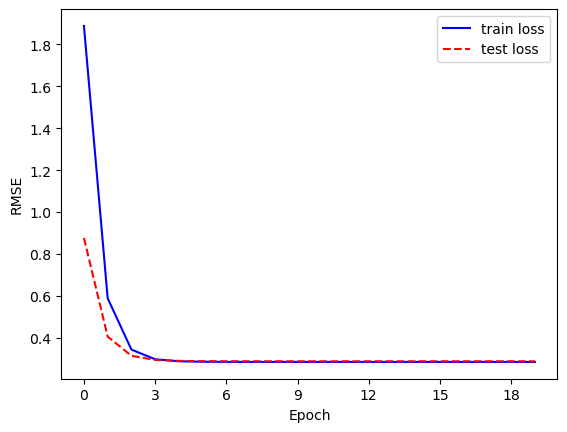

In [7]:
def SGD(num_epoch, learning_rate, batch_size):
    # 拼接原始矩阵
    X = np.concatenate([x_train, np.ones((len(x_train), 1))], axis=-1)
    X_test = np.concatenate([x_test, np.ones((len(x_test), 1))], axis=-1)
    # 随机初始化参数
    theta = np.random.normal(size=X.shape[1])

    # 随机梯度下降
    # 为了观察迭代过程，我们记录每一次迭代后在训练集和测试集上的均方根误差
    train_losses = []
    test_losses = []
    for i in range(num_epoch):
        # 初始化批量生成器
        batch_g = batch_generator(X, y_train, batch_size, shuffle=True)
        train_loss = 0
        for x_batch, y_batch in batch_g:
            # 计算梯度
            grad = x_batch.T @ (x_batch @ theta - y_batch)
            # 更新参数
            theta = theta - learning_rate * grad / len(x_batch)
            # 累加平方误差
            train_loss += np.square(x_batch @ theta - y_batch).sum()
        # 计算训练和测试误差
        train_loss = np.sqrt(train_loss / len(X))
        train_losses.append(train_loss)
        test_loss = np.sqrt(np.square(X_test @ theta - y_test).mean())
        test_losses.append(test_loss)

    # 输出结果，绘制训练曲线
    print('回归系数：', theta)
    return theta, train_losses, test_losses

# 设置迭代次数，学习率与批量大小
num_epoch = 20
learning_rate = 0.01
batch_size = 32
# 设置随机种子
np.random.seed(0)

_, train_losses, test_losses = SGD(num_epoch, learning_rate, batch_size)
    
# 将损失函数关于运行次数的关系制图，可以看到损失函数先一直保持下降，之后趋于平稳
plt.plot(np.arange(num_epoch), train_losses, color='blue', 
    label='train loss')
plt.plot(np.arange(num_epoch), test_losses, color='red', 
    ls='--', label='test loss')
# 由于epoch是整数，这里把图中的横坐标也设置为整数
# 该步骤也可以省略
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()

## 4.6 学习率对迭代的影响

在梯度下降算法中，学习率是一个非常关键的参数。我们调整上面设置的学习率，观察训练结果的变化。

回归系数： [0.64542258 0.47047873 0.33188398 0.00325404 0.42479699 0.00237965]
回归系数： [0.59247915 0.58561574 0.26554358 0.10173112 0.49435997 0.13108641]


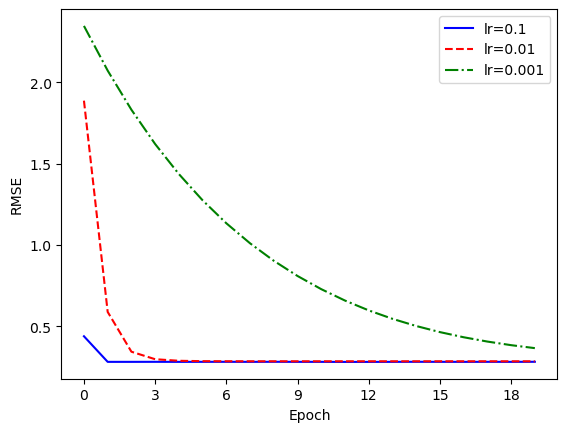

In [8]:
_, loss1, _ = SGD(num_epoch=num_epoch, learning_rate=0.1, 
    batch_size=batch_size)
_, loss2, _ = SGD(num_epoch=num_epoch, learning_rate=0.001, 
    batch_size=batch_size)
plt.plot(np.arange(num_epoch), loss1, color='blue', 
    label='lr=0.1')
plt.plot(np.arange(num_epoch), train_losses, color='red', 
    ls='--', label='lr=0.01')
plt.plot(np.arange(num_epoch), loss2, color='green',
    ls='-.', label='lr=0.001')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend()
plt.show()

可以看出，随着学习率增大，算法的收敛速度明显加快。那么，学习率是不是越大越好呢？我们将学习率继续上调到1.5观察结果。

回归系数： [-2.56988308e+83 -1.41878767e+82 -5.79381773e+83 -6.05363125e+83
 -1.04933464e+83 -2.27170862e+83]
最终损失： 3.98388523469088e+83


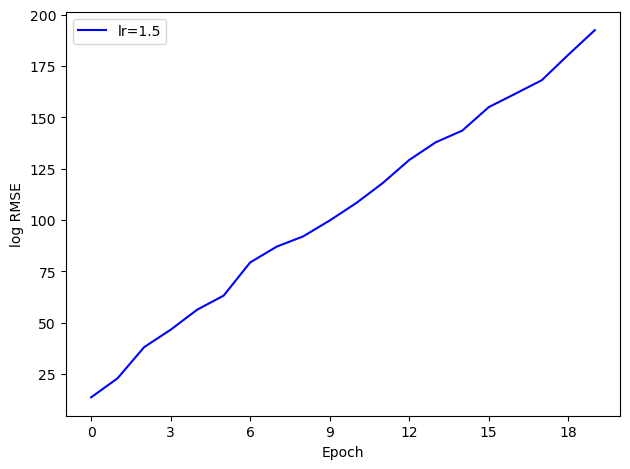

In [7]:
_, loss3, _ = SGD(num_epoch=num_epoch, learning_rate=1.5, batch_size=batch_size)
print('最终损失：', loss3[-1])
plt.plot(np.arange(num_epoch), np.log(loss3), color='blue', label='lr=1.5')
plt.xlabel('Epoch')
plt.ylabel('log RMSE')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend()
plt.show()

然而，算法的 RMSE 随着迭代不但没有减小，反而发散了。注意，由于原始的损失数值过大，我们将纵轴改为了损失的对数，因此图中的直线对应于实际的指数增长。上图最后的损失约为$10^{73}$。为了进一步说明这一现象产生的原因，我们用一个简单的例子来详细说明。假设我们要优化的目标函数是$J(x)=x^2$，那么梯度下降的迭代公式为：
$$
x \gets x - \eta \nabla J(x) = x - 2\eta x = (1-2\eta) x
$$

显然，该函数在$x=0$时可以取到唯一的全局最小值$J(0)=0$。设$x$的初始值为$x_0$，经过$k$次迭代后，$x$变为$x_k=(1-2\eta)^k x_0$。考虑学习率的大小对迭代过程的影响：
- 当$0 < \eta \le 0.5$时，$0\le 1-2\eta < 1$，有$\lim_{k\to+\infty} x_k=0$。$x$在迭代过程中始终与$x_0$符号相同，且迭代过程可以收敛。
- 当$0.5 < \eta < 1$时，$-1 < 1-2\eta < 0$，同样有$\lim_{k\to+\infty} x_k=0$。但$x$每次迭代都会改变符号，迭代过程可以收敛。
- 当$\eta = 1$时，$1-2\eta=-1$，迭代过程变为$x_{k+1}=-x_k$。因此$x_k$始终在$\pm x_0$间变化，迭代不收敛。
- 当$\eta > 1$时，$1-2\eta < -1$，有$\lim_{k\to+\infty} x_k=\infty$，每次迭代$x$的符号会改变，且向无穷大发散。

图4-6展示了在初始点$x_0=1$，学习率$\eta$分别为$0.15, 0.3, 0.75, 1.0, 1.05$时，前3次迭代中$x$的变化。可以看出，学习率在一定范围内增大时可以加速算法收敛，但学习率过大时，算法也会出现不稳定、甚至发散的情况。因此，梯度下降算法的学习率往往需要多次调整，才能找到合适的值。

<img src="sgd_lr.png" width="60%" alt="SGD">

图 4-6 不同学习率对梯度下降的影响

## 4.7 本章小结

在本章中，我们学习了线性回归问题和求解方法。线性回归是机器学习中最基础的参数化学习模型，线性回归任务是机器学习中最基础的有监督学习任务。本周讨论了求解线性回归问题的不同方法，并在房屋售价数据集上进行了实践。解析方法与梯度下降方法各有优劣。前者能直接得到精确的解，但计算的时空开销较大，其表达式一般情况下也难以计算；后者通过数值近似方法，用较小的时空复杂度得到了与精确解接近的结果，但是往往需要手动调整学习率和迭代次数。整体而言，梯度下降方法更为常用，它也衍生出了许多更有效、更快速的优化方法，是现代深度学习的基础之一。

## 习题

1. 以下关于线性回归的表述错误的是：
    A. 线性回归中的“线性”，是指模型参数$\boldsymbol \theta$之间不存在非线性耦合项。
    B. 线性回归常用均方误差作为损失函数。
    C.$f(x)=\theta_0 + \theta_1/x$可以是一个线性回归得到的模型表达式。
    D. 损失函数用于度量预测值和真实值之间的误差。

1. 以下关于梯度下降的表述错误的是：
    A. 使用梯度信息来最小化目标函数时，参数的更新方向是其梯度的负方向。
    B. 梯度下降中设置更大的学习率就可以更快地收敛到全局最优。
    C. 随机梯度下降是一种权衡训练速度和稳定性的方法。
    D. 损失函数的优化目标是最小化模型在训练集上的误差。

1. 假设在线性回归问题中，数据集有两个样本$\{\boldsymbol x_1 = (1,1,1), y_1=0\}$和$\{\boldsymbol x_2 = (0,1,2), y_2=1\}$，尝试用解析方式计算线性回归的参数$\theta$。计算中是否遇到了问题？

1. 针对1维线性回归问题，基于训练数据$\{(0.1, 0.3), (0.2, 0.35), (0.3, 0.41), (0.4, 0.48), (0.5, 0.54)\}$（其中第1维为唯一特征$x$，第2维为标签$y$），构建线性回归模型$f(x)=\theta_0 + \theta_1 x$，并完成以下任务：
    1. 试作图展示均方误差和参数$\theta_0$，$\theta_1$的函数关系；
    1. 并以不同的参数初始化位置和学习率，画出不同的参数学习轨迹；
    1. 尝试增大学习率，观察参数学习出现的发散现象。

1. 调整SGD算法中`batch_size`的大小，观察结果的变化。对较大规模的数据集，`batch_size`过小和过大分别有什么缺点？

1. 4.3节SGD算法的代码中，我们采用了固定迭代次数的方式，但是这样无法保证程序执行完毕时迭代已经收敛，也有可能迭代早已收敛而程序还在运行。另一种方案是，如果损失函数值连续$M$次迭代都没有减小，或者减小的量小于某个预设精度$\epsilon$（例如$10^{-6}$），就终止迭代。请实现该控制方案，并思考它和固定迭代次数之间的利弊。能不能将这两种方案同时使用呢？